In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pypsg.cfg as cfg
from pypsg.utils import name_file

In [3]:
latitudes = np.linspace(-90, 90, 49)
longitudes = np.linspace(0, 360, 65)[:-1]

In [4]:
start_date = '2019-03-24'
end_date = '2021-02-08'
dates = pd.date_range(
    start=start_date,
    end=end_date,
    periods=24,
    unit='s'
)

In [5]:
dates_list = dates.strftime('%Y/%m/%d %H:%M').to_list()

In [6]:
cfg_path = '../data/cfg/profiles/'

In [7]:
p = []
a = []
for date in dates_list:
    for lat in latitudes:
        for long in longitudes:
            temp_cfg = cfg.read_cfg(f"{cfg_path}{name_file('cfg', date, lat, long)}.txt")
            temp_df = cfg.read_atm_layers(temp_cfg)
            p.append(temp_df.Pressure)
            a.append(temp_df.Altitude)


In [8]:
p = np.asarray(p)
a = np.asarray(a)
a = np.where(a==0,1e-3,a)

## Custom Edges

In [9]:
def custom_edges(aa, nbin):
    nn = len(aa)
    return np.interp(np.linspace(0, nn, nbin + 1),
                     np.arange(nn),
                     np.sort(aa))

In [10]:
pcut1 = 1e-8
pcut2 = 1e-3
pmin = p.min()

In [11]:
p_med = p[np.logical_and(p>pcut1,p<pcut2)]
e_med = custom_edges(p_med, 20)
e_med = e_med[1:-1]

In [12]:
p_high = p[p>=pcut2]
e_high = custom_edges(p_high,30)

In [13]:
p_low = p[p<=pcut1]
e_low = custom_edges(p_low, 4)

In [14]:
ee = np.concatenate([e_low, [pcut1],e_med,e_high])


In [15]:
ee.shape

(56,)

In [16]:
ee

array([2.02230e-13, 3.32550e-12, 5.46870e-11, 8.99310e-10, 7.34390e-09,
       1.00000e-08, 1.47890e-08, 2.97810e-08, 5.99720e-08, 1.20770e-07,
       2.43200e-07, 4.89740e-07, 9.86220e-07, 1.98600e-06, 3.99930e-06,
       8.03570e-06, 1.58980e-05, 3.05540e-05, 5.60120e-05, 9.02550e-05,
       1.13960e-04, 2.05540e-04, 3.30773e-04, 5.01300e-04, 7.19660e-04,
       1.00000e-03, 1.19130e-03, 1.38850e-03, 1.60640e-03, 1.85590e-03,
       2.08660e-03, 2.35708e-03, 2.62270e-03, 2.87390e-03, 3.12750e-03,
       3.36960e-03, 3.58660e-03, 3.79250e-03, 3.99270e-03, 4.18180e-03,
       4.35290e-03, 4.51490e-03, 4.67210e-03, 4.82550e-03, 4.99180e-03,
       5.17460e-03, 5.40678e-03, 5.71610e-03, 6.06790e-03, 6.42400e-03,
       6.79640e-03, 7.17030e-03, 7.56410e-03, 8.04270e-03, 8.57040e-03,
       1.32550e-02])

In [31]:
boh = np.digitize(p, ee)
de = np.diff(ee)
cnt = ee[:-1]+de/2
cnt.shape

(51,)

In [35]:
boh = np.where(boh==52,51,boh)
boh2 = cnt[boh-1]

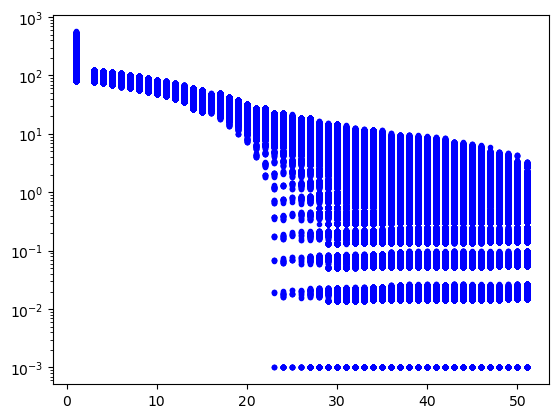

In [36]:
plt.plot(boh, a, 'b.')
plt.yscale('log')
plt.show()

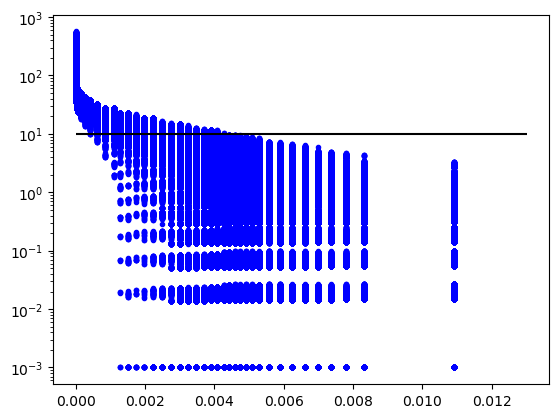

In [39]:
plt.plot(boh2, a, 'b.')
plt.yscale('log')
plt.hlines(y=10,xmin=1e-13,xmax=1.3e-2, color = 'k')
plt.show()

In [17]:
np.save('p_edges.npy', ee)

: 